<a href="https://colab.research.google.com/github/flashdrive452/Food_Classifier/blob/main/Food_101_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download binary data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-02-11 12:08:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.182.128, 173.194.193.128, 173.194.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.182.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   271MB/s    in 0.4s    

2022-02-11 12:08:42 (271 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
for dir_path, dir_name, file_name in os.walk("pizza_steak"):
  print(f"There are {len(dir_name)} directories and {len(file_name)} files in path: {dir_path}")

There are 2 directories and 0 files in path: pizza_steak
There are 2 directories and 0 files in path: pizza_steak/test
There are 0 directories and 250 files in path: pizza_steak/test/steak
There are 0 directories and 250 files in path: pizza_steak/test/pizza
There are 2 directories and 0 files in path: pizza_steak/train
There are 0 directories and 750 files in path: pizza_steak/train/steak
There are 0 directories and 750 files in path: pizza_steak/train/pizza


In [ ]:
class_names = np.array(sorted(os.listdir("pizza_steak/train/")))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# Create a function to view random images
import matplotlib.image as mpimg
import random

def view_random_images(img_path, image_class, image_number):
  """
  This is a function to view random images from the provided path
  img_path: This is the path to search for images
  image_number: This is the number of random images to view
  """
  for number in range(image_number):
    image_filename = random.sample(os.listdir(img_path+image_class+"/"), 1)[0]
    random_image_path = img_path + image_class + "/" + image_filename
    plt.figure(figsize=(4,4))
    img = mpimg.imread(random_image_path)
    plt.title(image_class + " - " + image_filename)
    plt.axis(False)
    plt.imshow(img)
  return img

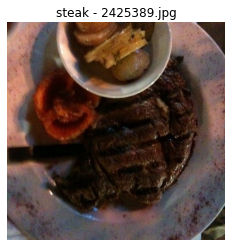

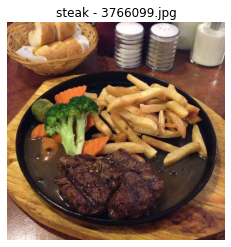

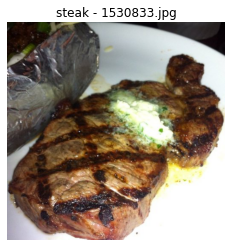

In [ ]:
rand_img = view_random_images("pizza_steak/train/","steak", 3)

In [ ]:
rand_img.shape

(512, 512, 3)

In [ ]:
# Now Let's create a Model to classify these images

tf.random.set_seed(42)

INPUT_SHAPE = (224, 224, 3)
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_dir = "pizza_steak/train/"
test_data_dir = "pizza_steak/test/"

# Create batches of data
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_data_dir,
                                                   batch_size=BATCH_SIZE,
                                                   image_size=IMG_SIZE,
                                                   label_mode="binary",
                                                   seed=42)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_data_dir,
                                                   batch_size=BATCH_SIZE,
                                                   image_size=IMG_SIZE,
                                                   label_mode="binary",
                                                   seed=42,
                                                   shuffle=False)

# Create CNN model
inputs = tf.keras.layers.Input(shape=INPUT_SHAPE, name="input_layer")
x = tf.keras.layers.Conv2D(10, 3, activation="relu")(inputs)
x = tf.keras.layers.MaxPool2D(pool_size=(2), padding="valid")(x)
x = tf.keras.layers.Conv2D(10, 3, activation="relu")(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2))(x)
x = tf.keras.layers.Conv2D(10, 3, activation="relu")(x)
x = tf.keras.layers.Conv2D(10, 3, activation="relu")(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2))(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")(x)

CNN_pizza_steak = tf.keras.Model(inputs, outputs)

# Compile the Model
CNN_pizza_steak.compile(loss="BinaryCrossentropy",
                        optimizer="Adam",
                        metrics=["accuracy"])

# Fit the Model
CNN_pizza_steak.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 116ms/step - loss: 1.5465 - accuracy: 0.5633 - val_loss: 0.6441 - val_accuracy: 0.6520
Epoch 2/5
47/47 [==============================] - 5s 102ms/step - loss: 0.5656 - accuracy: 0.7300 - val_loss: 0.5514 - val_accuracy: 0.7180
Epoch 3/5
47/47 [==============================] - 5s 100ms/step - loss: 0.4833 - accuracy: 0.7813 - val_loss: 0.5399 - val_accuracy: 0.7140
Epoch 4/5
47/47 [==============================] - 5s 100ms/step - loss: 0.4060 - accuracy: 0.8227 - val_loss: 0.4390 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 5s 101ms/step - loss: 0.3344 - accuracy: 0.8613 - val_loss: 0.5114 - val_accuracy: 0.7720


In [ ]:
CNN_pizza_steak.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910 

In [ ]:
# Let's scale up to 10 food classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-02-11 12:09:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.194.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   230MB/s    in 2.2s    

2022-02-11 12:09:31 (230 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import zipfile

zipref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zipref.extractall()
zipref.close()

In [ ]:
for path, directory, filename in os.walk("10_food_classes_all_data"):
  print(f"There are {len(directory)} directories and {len(filename)} files in the path: {path}")

There are 2 directories and 0 files in the path: 10_food_classes_all_data
There are 10 directories and 0 files in the path: 10_food_classes_all_data/test
There are 0 directories and 250 files in the path: 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 files in the path: 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 files in the path: 10_food_classes_all_data/test/steak
There are 0 directories and 250 files in the path: 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 files in the path: 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 files in the path: 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 files in the path: 10_food_classes_all_data/test/sushi
There are 0 directories and 250 files in the path: 10_food_classes_all_data/test/pizza
There are 0 directories and 250 files in the path: 10_food_classes_all_data/test/ramen
There are 0 directories and 250 f

In [ ]:
class_names = np.array(sorted(os.listdir("10_food_classes_all_data/train/")))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

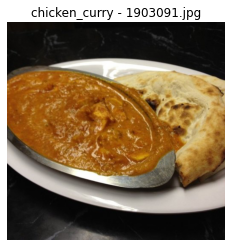

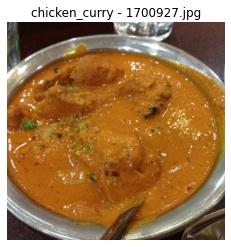

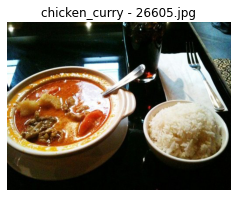

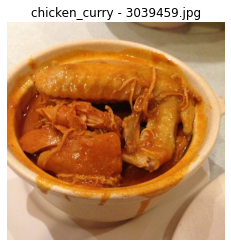

In [ ]:
img = view_random_images("10_food_classes_all_data/train/", "chicken_curry", 4)

In [ ]:
# Modelling time 🥳🥳
tf.random.set_seed(42)

INPUT_SHAPE = (224, 224, 3)
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 batch_size=32,
                                                                 image_size=IMG_SIZE,
                                                                 seed=42)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               label_mode="categorical",
                                                               batch_size=32,
                                                               image_size=IMG_SIZE,
                                                               seed=42,
                                                               shuffle=False)

# Create Model
efficientB0 = tf.keras.applications.EfficientNetB0(include_top=False)
efficientB0.trainable = False

inputs = tf.keras.layers.Input(shape=INPUT_SHAPE, name="Input Layer")
x = efficientB0(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model_10_all_classes = tf.keras.Model(inputs, outputs)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.
16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
model_10_all_classes.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_6 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
model_10_all_classes.compile(optimizer="Adam",
                             loss=tf.keras.losses.CategoricalCrossentropy(),
                             metrics=["accuracy"])

In [ ]:
history_model_10_all_classes = model_10_all_classes.fit(train_data,
                                                        epochs=5,
                                                        steps_per_epoch = len(train_data),
                                                        validation_data=test_data,
                                                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 469s 2s/step - loss: 0.8905 - accuracy: 0.7445 - val_loss: 0.4470 - val_accuracy: 0.8792
Epoch 2/5
235/235 [==============================] - 456s 2s/step - loss: 0.4941 - accuracy: 0.8523 - val_loss: 0.3715 - val_accuracy: 0.8884
Epoch 3/5
235/235 [==============================] - 464s 2s/step - loss: 0.4173 - accuracy: 0.8769 - val_loss: 0.3369 - val_accuracy: 0.8972
Epoch 4/5
235/235 [==============================] - 465s 2s/step - loss: 0.3688 - accuracy: 0.8883 - val_loss: 0.3203 - val_accuracy: 0.8996
Epoch 5/5
235/235 [==============================] - 455s 2s/step - loss: 0.3325 - accuracy: 0.9000 - val_loss: 0.3096 - val_accuracy: 0.9024


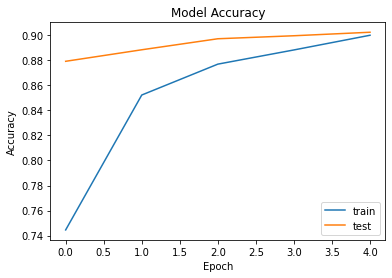

In [ ]:
plt.plot(history_model_10_all_classes.history["accuracy"])
plt.plot(history_model_10_all_classes.history["val_accuracy"])
plt.legend(['train','test'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

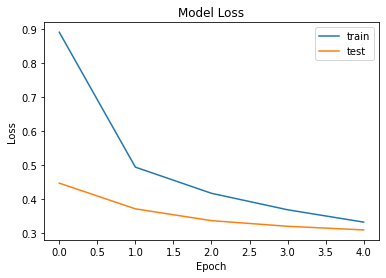

In [ ]:
plt.plot(history_model_10_all_classes.history["loss"])
plt.plot(history_model_10_all_classes.history["val_loss"])
plt.legend(['train','test'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

In [ ]:
# Use our trained model to make predictions on the test dataset
pred_probs = model_10_all_classes.predict(test_data)
pred_probs[:10]

array([[8.56595755e-01, 2.32387637e-03, 5.64516475e-03, 1.60183925e-02,
        1.33974609e-04, 4.31746557e-05, 1.90743851e-03, 7.89589137e-02,
        3.78421843e-02, 5.31150319e-04],
       [7.86515415e-01, 1.44782038e-02, 2.22674781e-03, 5.15318196e-03,
        1.83574040e-03, 8.07548990e-04, 8.93710367e-03, 1.71611115e-01,
        7.97702465e-03, 4.57900314e-04],
       [2.64926761e-01, 2.38320581e-03, 4.86914243e-04, 1.53916902e-04,
        1.67177364e-04, 1.03776569e-04, 5.91964051e-02, 6.70769095e-01,
        1.55538495e-03, 2.57348409e-04],
       [9.08197224e-01, 1.27548724e-02, 3.11187655e-02, 1.05537241e-02,
        3.94980423e-03, 6.18444174e-05, 9.14960261e-03, 2.22361423e-02,
        1.85072573e-03, 1.27278297e-04],
       [6.85457289e-01, 3.72247188e-03, 3.37089151e-02, 2.06034645e-01,
        1.57326981e-02, 1.07695221e-03, 2.61095185e-02, 4.17471584e-03,
        1.77953634e-02, 6.18746039e-03],
       [9.67586458e-01, 2.09458376e-04, 1.11737452e-03, 3.00277170e-04,
   

In [ ]:
# Check that each array of 10 predictions sum up to approximately 1
sum(pred_probs[0])

1.0000000243417162

In [ ]:
# Use the class names created earlier and get the name of the max probability in the first prediction array
pred_class = pred_probs[0].argmax()
class_name = class_names[pred_class]
class_name

'chicken_curry'

In [ ]:
# Get the max probability from the array of predictions
pred_classes = pred_probs.argmax(axis=1)
pred_classes[:10]

array([0, 0, 7, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Now let's get the True labels
y_labels = []
y_names = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
  y_names.append(class_names[labels.numpy().argmax()])

In [ ]:
len(pred_classes), len(y_labels)

(2500, 2500)

In [ ]:
pred_names = []
for label in pred_classes:
  pred_names.append(class_names[label])

In [ ]:
len(y_names), len(pred_names)

(2500, 2500)

### Our Model's Prediction - Analysis

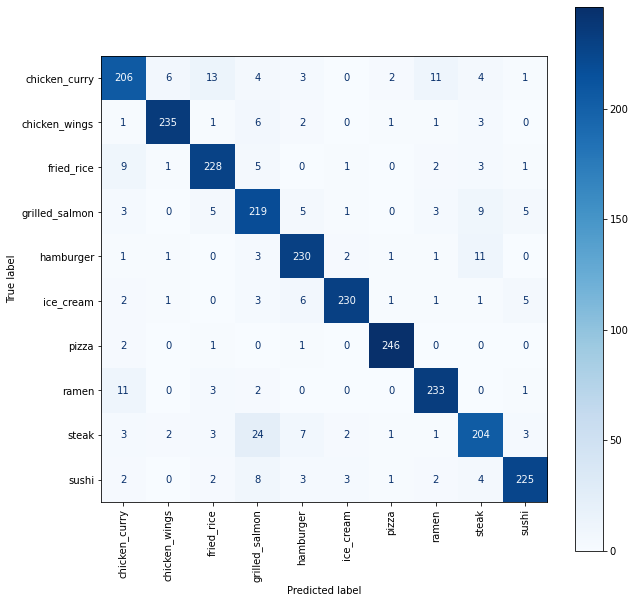

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_names, pred_names, labels=class_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=class_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation="vertical")

In [ ]:
# Let's get a classification report for our predictions
from sklearn.metrics import classification_report

classification_report_dict = classification_report(y_true=y_labels,
                                                   y_pred=pred_classes,
                                                   output_dict=True)
classification_report_dict

{'0': {'f1-score': 0.8408163265306122,
  'precision': 0.8583333333333333,
  'recall': 0.824,
  'support': 250},
 '1': {'f1-score': 0.9475806451612904,
  'precision': 0.9552845528455285,
  'recall': 0.94,
  'support': 250},
 '2': {'f1-score': 0.9011857707509882,
  'precision': 0.890625,
  'recall': 0.912,
  'support': 250},
 '3': {'f1-score': 0.83587786259542,
  'precision': 0.7992700729927007,
  'recall': 0.876,
  'support': 250},
 '4': {'f1-score': 0.9072978303747535,
  'precision': 0.8949416342412452,
  'recall': 0.92,
  'support': 250},
 '5': {'f1-score': 0.9406952965235174,
  'precision': 0.9623430962343096,
  'recall': 0.92,
  'support': 250},
 '6': {'f1-score': 0.978131212723658,
  'precision': 0.9723320158102767,
  'recall': 0.984,
  'support': 250},
 '7': {'f1-score': 0.9227722772277228,
  'precision': 0.9137254901960784,
  'recall': 0.932,
  'support': 250},
 '8': {'f1-score': 0.8343558282208589,
  'precision': 0.8535564853556485,
  'recall': 0.816,
  'support': 250},
 '9': {'

In [ ]:
# Create a new dictionary containing pred classes and F1 scores
pred_f1_scores = {}
for k, v in classification_report_dict.items():
  if(k=="accuracy"):
    break
  else:
    pred_f1_scores[int(k)] = v["f1-score"]

# We can get this in a dataframe
pred_f1_table = pd.DataFrame({"pred_class":list(class_names[list(pred_f1_scores.keys())]),
                             "f1-score":list(pred_f1_scores.values())}).sort_values(by="f1-score",ascending=True)

pred_f1_table

,pred_class,f1-score
8,steak,0.834356
3,grilled_salmon,0.835878
0,chicken_curry,0.840816
2,fried_rice,0.901186
4,hamburger,0.907298
9,sushi,0.916497
7,ramen,0.922772
5,ice_cream,0.940695
1,chicken_wings,0.947581
6,pizza,0.978131


Text(0.5, 1.0, 'Prediction Classes and F1 Scores')

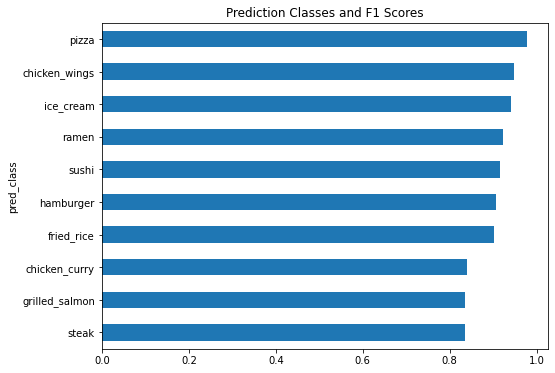

In [ ]:
# Now let's see this on a bar chart
ax = pred_f1_table.plot.barh(y="f1-score", x="pred_class", figsize=(8, 6))
ax.get_legend().remove()
ax.set_title("Prediction Classes and F1 Scores")

In [ ]:
# Now let us make a function to predict on random test images

def preprocess_images(filepath):
  img = tf.io.read_file(filepath)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.resize(img, [224,224])
  return img

10_food_classes_all_data/test/sushi/3460245.jpg
10_food_classes_all_data/test/grilled_salmon/2528707.jpg
10_food_classes_all_data/test/fried_rice/903220.jpg


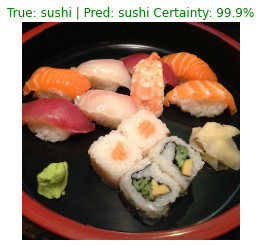

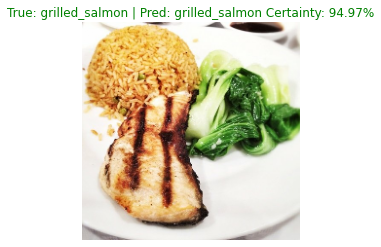

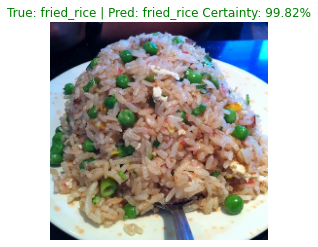

In [ ]:
# Let's get a random image path
for i in range(3):
  random_class = random.choice(class_names)
  random_image = random.choice(os.listdir(test_dir + random_class))
  image_path = test_dir + random_class + "/" + random_image
  print(image_path)

  # Let's preprocess with our function
  img = preprocess_images(image_path)

  # Now let's predict on the sample image
  expanded_img = tf.expand_dims(img, axis=0)
  pred_probs = model_10_all_classes.predict(expanded_img) # Get all pred probs, expand dims to modify shape like batched dataset
  pred_class = class_names[pred_probs.argmax()]

  # Set color of true and predicted labels
  if random_class==pred_class:
    color='g'
  else:
    color='r'

  # Let's visualize
  plt.figure(figsize=(4,4))
  plt.imshow(img/255.)
  plt.title("True: "+ random_class + " | Pred: " + pred_class + " Certainty: " + str(round((pred_probs[0][pred_probs[0].argmax()])*100,2)) + "%", fontdict={'color':color})
  plt.axis(False)